<a href="https://colab.research.google.com/github/tarabelo/PIAC-2526/blob/main/06_B%C3%BAsqueda_adaptativa_de_Grover_(GAS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 67.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=c38fb4a78cea7c0a19a11ee11909abb12ef77813d66e315d5516195921a62b49
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


# **Búsqueda adaptativa de Grover (GAS)**

# **Suma en _phase encoding_**

Un ejemplo de codificación en la fase de un número entero $j$ de $n$-bits es la siguiente:

$$
\frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n-1} \exp\left(\frac{2\pi ijk}{2^n}\right)|k\rangle
$$

Por ejemplo, el 0 se representa como:

$$
\frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n-1} \exp\left(\frac{2\pi i0k}{2^n}\right)|k\rangle = \frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n-1} |k\rangle
$$

Sea un entero $j \ge 0$ codificado en la fase al que queremos sumarle otro entero no negativo $l$ para obtener:

$$
\frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^n-1} \exp\left(\frac{2\pi i(j+l)k}{2^n}\right)|k\rangle
$$



Esta suma se puede hacer con puertas fase como se muestra en el siguiente circuito:

<center><img src="https://drive.google.com/uc?export=view&id=1ZSkZZhdM9KLNMvITQbro4ic9yYxcPuPU" alt="Suma phase encoding" width="300"  /></center>

Es decir, al cúbit $k_h$ se le aplica la puerta

$$
P\!\left(\frac{\pi}{2^{n-1-h}}\,l\right)
$$



## Funcionamiento
Sea $|k\rangle = |k_{n-1}\ldots k_0\rangle$ un estado base. Sea $k_h\in\{0,1\}$ el bit $h$-ésimo:

- Si el qubit $k_h$ vale 0 → la puerta no introduce fase.  
- Si el qubit $k_h$ vale 1 → añade fase  $\exp\left(\frac{i\pi\,l}{2^{n-1-h}}\right)$.


El estado $|k\rangle$ recibe por tanto la fase total:

$$
\prod_{h=0}^{n-1}
\exp\left(\frac{i \pi l\, k_h}{2^{n-1-h}}\right)
=
\exp\left({i\pi l \sum_{h=0}^{n-1} \frac{k_h}{2^{n-1-h}}}\right).
$$

Usando la expansión binaria, el entero $k$ se puede escribir:

$$
k = \sum_{h=0}^{n-1} k_h 2^h \implies \frac{k}{2^{n-1}} = \sum_{h=0}^{n-1} \frac{k_h}{2^{n-1-h}}
$$


Por tanto, la fase total aplicada resulta:

$$
\exp\left(\frac{i \pi l k}{2^{n-1}}\right)
= \exp\left(\frac{2i \pi l k}{2^{n}}\right).
$$

## Resultado final
Aplicar este circuito a un entero $j$ codificado en la fase::

$$
\frac{1}{\sqrt{2^n}}
\sum_{k=0}^{2^{n-1}} \exp\left(\frac{2\pi i j k}{2^n}\right)|k\rangle
$$

produce:

$$
\boxed{
\frac{1}{\sqrt{2^n}}
\sum_{k=0}^{2^{n-1}} \exp\left(\frac{2\pi i (j+l) k}{2^n}\right)|k\rangle
}
$$

lo cual implementa la suma de enteros en codificación de fase.


## Números negativos

Usando complemento a 2 para representar enteros negativos, la representación binaria de $l\lt 0$ es:

$$
l = 2^n-|l| = 2^n + l
$$

Por lo tanto, la fase aplicada por el circuito anterior al $h$-ésimo bit será:

$$
\exp\left(\frac{i\pi(2^n+l)}{2^{n-1-h}}\right) = \exp\left(\frac{i\pi\,2^n}{2^{n-1-h}}\right) \exp\left(\frac{i\pi\,l}{2^{n-1-h}}\right) = \exp\left(\frac{i\pi\,l}{2^{n-1-h}}\right).
$$

ya que:

$$
\exp\left(\frac{i\pi\,2^n}{2^{n-1-h}}\right) = \exp\left(i\pi\,2^{h+1}\right) = 1
$$

Es decir, el circuito nos sirve para números negarivos y positivos.

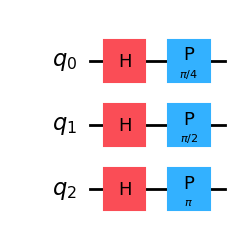

In [16]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

n=3
l = 1

qc = QuantumCircuit(n)

qc.h(range(n))

for h in range(n):
  qc.p((np.pi*l)/2**(n-1-h),h)

qc.draw('mpl')

In [17]:
e = Statevector.from_instruction(qc)

In [18]:
e.draw('latex')

<IPython.core.display.Latex object>